# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [1]:
import pandas as pd

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1828,19,Private,286469,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
1441,61,?,347089,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,16,United-States,<=50K
10591,26,Private,104746,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,5013,0,60,United-States,<=50K
20550,18,Private,212936,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,<=50K
17543,37,Private,337778,11th,7,Divorced,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
12991,76,?,79445,10th,6,Married-civ-spouse,?,Husband,White,Male,1173,0,40,United-States,<=50K
12590,31,Private,66278,Some-college,10,Married-civ-spouse,Prof-specialty,Wife,White,Female,3908,0,40,United-States,<=50K
11240,45,Self-emp-not-inc,54098,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,>50K
13889,33,Private,155475,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
3131,25,?,237865,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,?,<=50K


Celula 1 — Importuri + setări

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  # stil vizual ok pentru notebook


De ce?
Ai nevoie de pandas/numpy pentru analiză și matplotlib/seaborn pentru grafice.

Celula 2 — Încărcare date + curățare minimă (spații, missing)

In [4]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

df = pd.read_csv(
    data_url,
    header=None,
    names=columns,
    na_values=" ?",
    skipinitialspace=True
)

# curățare: strip la categorice (inconsistențe de spații)
obj_cols = df.select_dtypes(include="object").columns
df[obj_cols] = df[obj_cols].apply(lambda s: s.str.strip())

df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


De ce?

na_values=" ?" transformă “ ?” în NaN (missing real).

strip() previne categorii duplicate din cauza spațiilor (ex: " United-States" vs "United-States").

Celula 3 — Overview rapid: dimensiuni, tipuri, preview

In [5]:
print("Shape:", df.shape)
display(df.info())
display(df.describe(include="all").T.head(20))


Shape: (32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital-status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


De ce?
Bifează cerința de “summary using descriptive stats” și îți arată tipurile de coloane.

CERINȚA 1: Analizează distribuția targetului hours-per-week (hist + density) + outlieri/skewness

Celula 4 — Distribuție target: histogramă + KDE

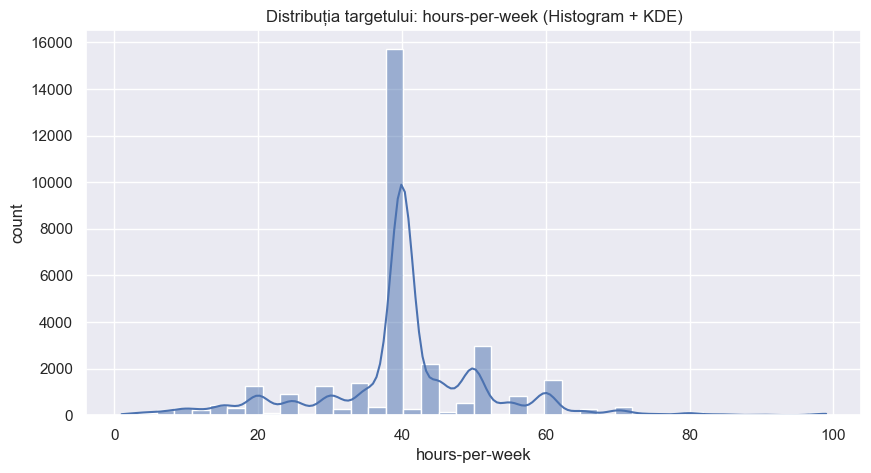

In [6]:
target = "hours-per-week"

plt.figure(figsize=(10,5))
sns.histplot(df[target], bins=40, kde=True)
plt.title("Distribuția targetului: hours-per-week (Histogram + KDE)")
plt.xlabel("hours-per-week")
plt.ylabel("count")
plt.show()


Ce urmărești?

unde e “vârful” distribuției (modă)

coadă dreapta (skewness)

valori extreme (ex: 80–99 ore)

Celula 5 — Statistici target + skewness + percentiles

In [7]:
t = df[target]
print("Mean:", t.mean())
print("Median:", t.median())
print("Std:", t.std())
print("Skewness:", t.skew())
print("\nQuantiles:")
display(t.quantile([0, 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1]))


Mean: 40.437455852092995
Median: 40.0
Std: 12.347428681731843
Skewness: 0.227642536804501

Quantiles:


0.00     1.0
0.01     8.0
0.05    18.0
0.25    40.0
0.50    40.0
0.75    45.0
0.95    60.0
0.99    80.0
1.00    99.0
Name: hours-per-week, dtype: float64

De ce?

Mean vs median îți spune dacă e skewed.

Quantiles îți arată intervale realiste și outlieri.

CERINȚA 2: Summary dataset (mean, median, std etc.)

Celula 6 — Summary pentru numerice (mean/median/std) + număr valori unice

In [8]:
num_cols = df.select_dtypes(include=[np.number]).columns

summary_num = pd.DataFrame({
    "mean": df[num_cols].mean(),
    "median": df[num_cols].median(),
    "std": df[num_cols].std(),
    "min": df[num_cols].min(),
    "max": df[num_cols].max(),
    "missing": df[num_cols].isna().sum()
})

display(summary_num)


,mean,median,std,min,max,missing
age,38.581647,37.0,13.640433,17,90,0
fnlwgt,189778.366512,178356.0,105549.977697,12285,1484705,0
education-num,10.080679,10.0,2.572720,1,16,0
capital-gain,1077.648844,0.0,7385.292085,0,99999,0
capital-loss,87.303830,0.0,402.960219,0,4356,0
hours-per-week,40.437456,40.0,12.347429,1,99,0


CERINȚA 3: Missing values — număr + procent pe coloană

Celula 7 — Tabel missing values (count + %)

In [9]:
missing_count = df.isna().sum()
missing_pct = (missing_count / len(df)) * 100

missing_table = pd.DataFrame({
    "missing_count": missing_count,
    "missing_pct": missing_pct.round(2)
}).sort_values("missing_count", ascending=False)

display(missing_table)


,missing_count,missing_pct
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
education-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
sex,0,0.0


De ce?
Raportezi exact numărul și procentul lipsurilor pentru fiecare coloană.

CERINȚA 4: Outlieri într-o coloană numerică (boxplot)

Alege una cu outlieri clari: capital-gain e perfect.

Celula 8 — Boxplot pentru outlieri (capital-gain)

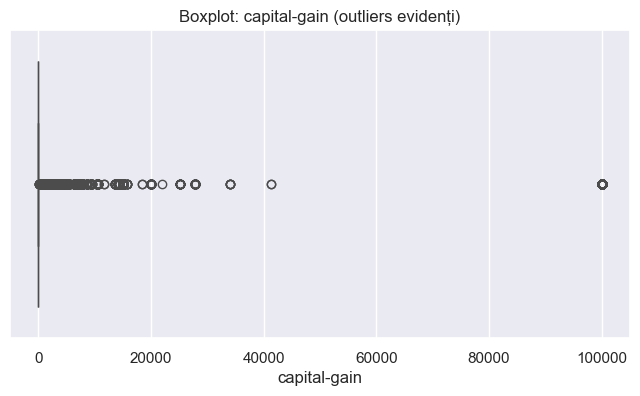

In [10]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["capital-gain"])
plt.title("Boxplot: capital-gain (outliers evidenți)")
plt.xlabel("capital-gain")
plt.show()


capital-gain are multe valori 0 și puține valori foarte mari → distribuție extrem de asimetrică (heavy right tail).

Celula 9 — Identificare numerică outlieri (IQR)

In [11]:
col = "capital-gain"
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower) | (df[col] > upper)]
print(f"{col} - Lower bound: {lower}, Upper bound: {upper}")
print("Nr outlieri:", outliers.shape[0])
outliers[[col, target]].head()


capital-gain - Lower bound: 0.0, Upper bound: 0.0
Nr outlieri: 2712


,capital-gain,hours-per-week
0,2174,40
8,14084,50
9,5178,40
59,5013,40
60,2407,40


De ce?
Ai o definiție standard (IQR rule) + număr concret de outlieri.

3 histograme pentru 3 coloane numerice + discuție

Celula 10 — Histograme numerice: age, education-num, hours-per-week

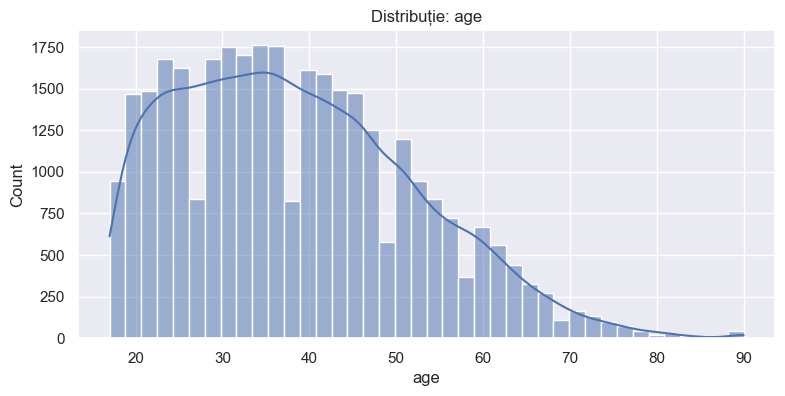

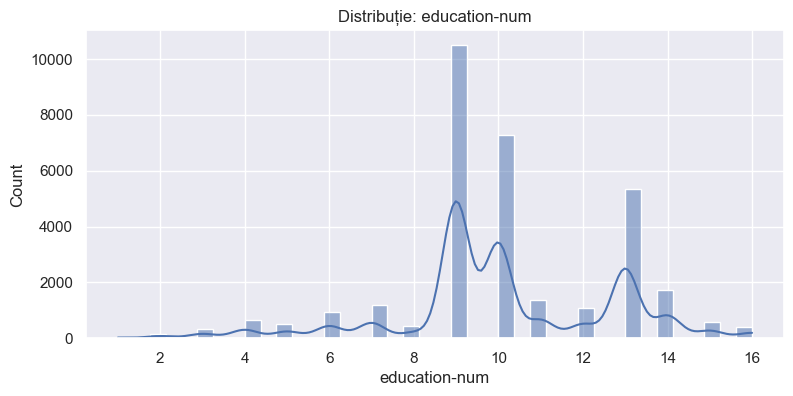

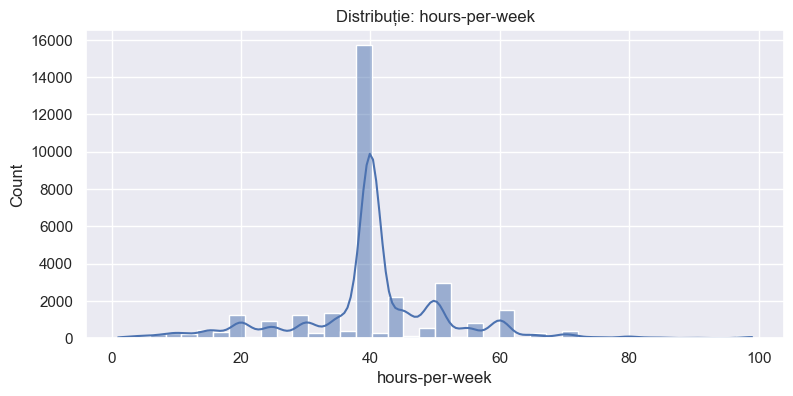

In [12]:
num_to_plot = ["age", "education-num", "hours-per-week"]

for c in num_to_plot:
    plt.figure(figsize=(9,4))
    sns.histplot(df[c], bins=40, kde=True)
    plt.title(f"Distribuție: {c}")
    plt.show()


age tinde să fie unimodal / ușor skewed.

education-num e discret (valori întregi), posibil multimodal.

hours-per-week are vârf puternic la ~40.

3 barploturi pentru 3 coloane categorice

Celula 11 — Barplot categorice (top 10)

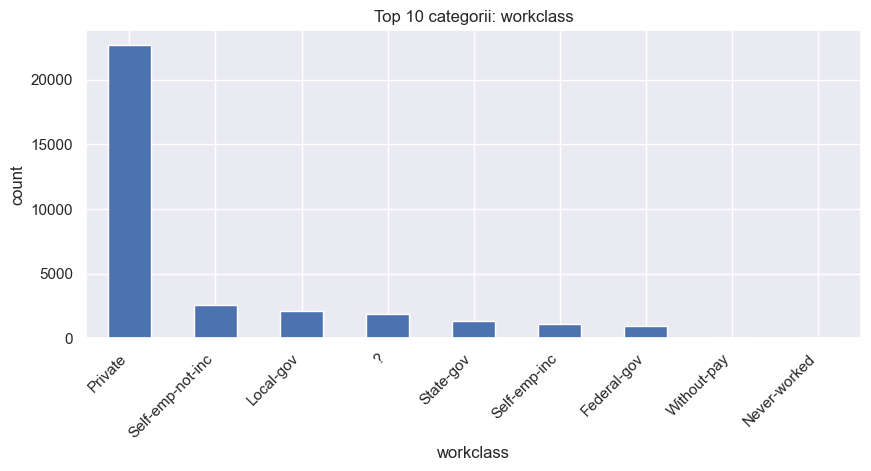

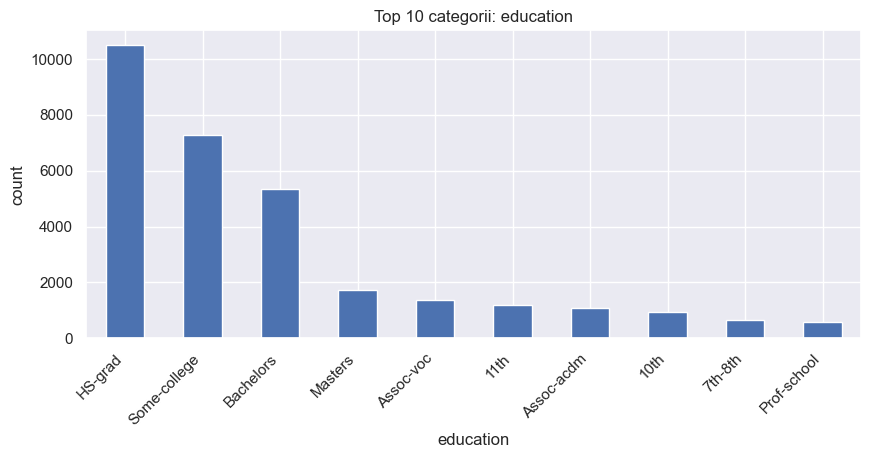

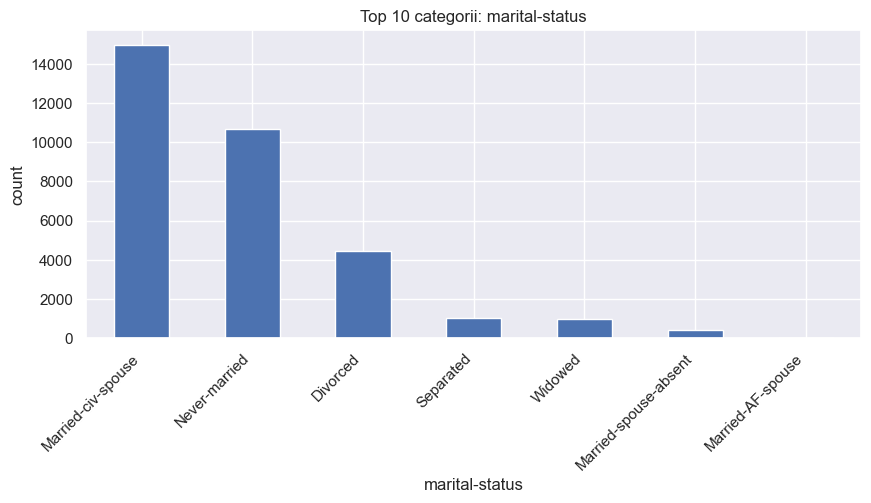

In [13]:
cat_to_plot = ["workclass", "education", "marital-status"]

for c in cat_to_plot:
    plt.figure(figsize=(10,4))
    df[c].value_counts().head(10).plot(kind="bar")
    plt.title(f"Top 10 categorii: {c}")
    plt.ylabel("count")
    plt.xticks(rotation=45, ha="right")
    plt.show()


clase dominante (ex: Private la workclass)

distribuții dezechilibrate.

Corelații: target vs numerice + heatmap

Celula 12 — Corelație target cu numerice

In [14]:
corr = df[num_cols].corr(numeric_only=True)

target_corr = corr[target].sort_values(ascending=False)
display(target_corr)


hours-per-week    1.000000
education-num     0.148123
capital-gain      0.078409
age               0.068756
capital-loss      0.054256
fnlwgt           -0.018768
Name: hours-per-week, dtype: float64

Celula 13 — Heatmap corelații numerice

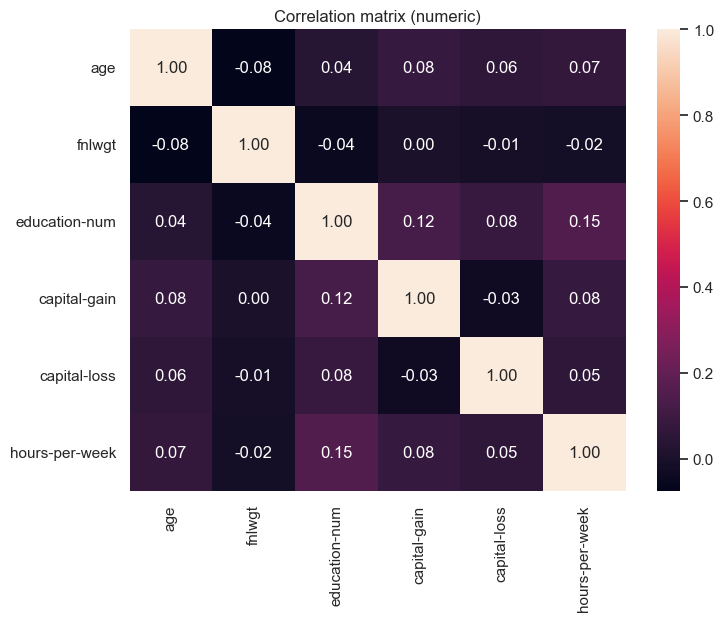

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation matrix (numeric)")
plt.show()


care e cea mai mare corelație cu hours-per-week (de obicei e mică/moderată).

capital-gain poate avea legătură, dar fiind skewed, corelația simplă poate fi înșelătoare.

Scatter: variabila cea mai corelată cu target

Celula 14 — Scatter plot (alegi top corelată)

Best correlated var (numeric): education-num


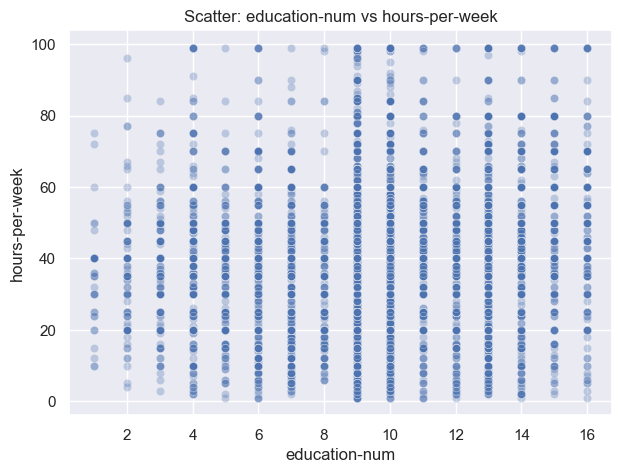

In [16]:
best_var = target_corr.index[1]  # index[0] e chiar targetul
print("Best correlated var (numeric):", best_var)

plt.figure(figsize=(7,5))
sns.scatterplot(x=df[best_var], y=df[target], alpha=0.3)
plt.title(f"Scatter: {best_var} vs {target}")
plt.show()


trend vizibil / lipsa trendului

efecte de “cluster” (ex multe puncte pe 0 la capital-gain)

Relația target vs categorice (boxplot / violin)

Celula 15 — Boxplot target vs o categorică (ex: workclass)

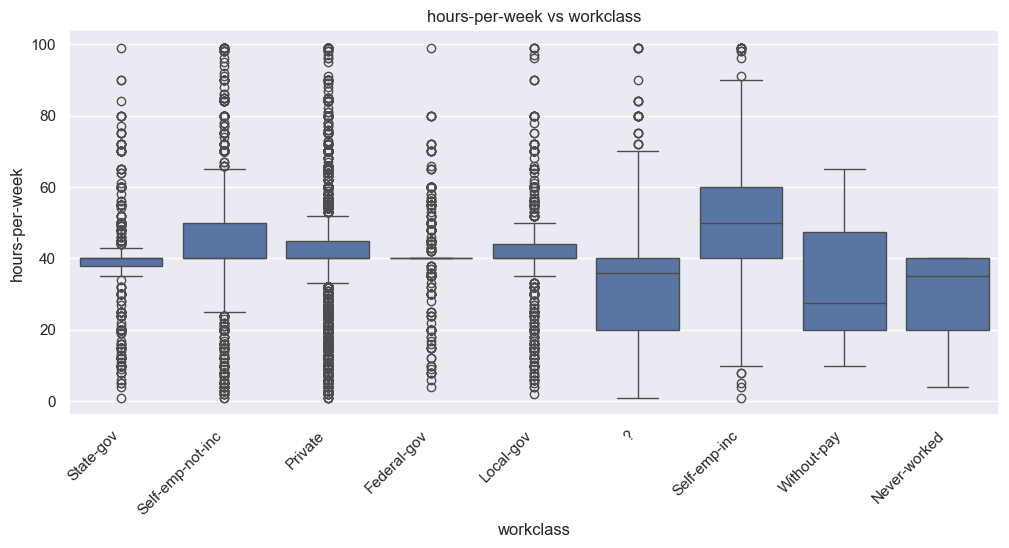

In [17]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="workclass", y=target)
plt.title("hours-per-week vs workclass")
plt.xticks(rotation=45, ha="right")
plt.show()


mediane diferite între categorii

spread (variație) diferit.

Raport / concluzii EDA (text în Markdown)

Celula 16 — Markdown 

Raport EDA (Task 2) – Adult Census (hours-per-week)

Distribuția targetului hours-per-week este concentrată puternic în jurul valorii ~40 ore/săptămână, sugerând un mod dominant (program standard). Distribuția prezintă o coadă spre dreapta, indicând existența unor persoane care lucrează semnificativ mai mult.

Pentru variabile numerice, capital-gain (și adesea capital-loss) prezintă o distribuție extrem de asimetrică: majoritatea valorilor sunt 0, iar un număr mic de observații au valori foarte mari. Boxplot-ul confirmă prezența outlierilor.

Analiza valorilor lipsă arată că anumite coloane categorice (de exemplu workclass, occupation, native-country) conțin lipsuri (NaN) și vor necesita imputare în etapa de preprocessing.

Corelațiile dintre hours-per-week și variabilele numerice sunt în general slabe/moderate, ceea ce sugerează că relațiile relevante pot fi neliniare sau dependente de interacțiuni (ex: ocupație, statut marital).

Zone pentru investigații suplimentare: relația dintre hours-per-week și categorice precum occupation, relationship, workclass (prin boxplot/violin), precum și transformări (ex log pentru capital-gain) pentru a reduce influența outlierilor.